<a href="https://colab.research.google.com/github/micah-shull/Data_Analysis/blob/main/DataAnalysis_2_ClassificationModels_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Classification Models

Classification models are powerful tools in the machine learning toolkit, enabling us to make sense of data by categorizing it into distinct classes. Imagine being able to predict whether an email is spam or not, whether a tumor is malignant or benign, or even whether a customer will buy a product based on their browsing history. These are all tasks that classification models excel at by learning from past data and making informed predictions about new instances.

### Starting with Simple Models

When diving into classification, it's often best to start with simpler models before progressing to more complex ones. Here's why:

1. **Interpretability**: Simple models like Logistic Regression are transparent and easy to understand. They provide clear insights into which features are important and how they influence predictions, making them ideal for initial analysis and gaining a quick understanding of your data.

2. **Baseline Performance**: Simple models establish a performance benchmark. By starting with a straightforward model, you can set a standard to compare against more complex models to see if they offer substantial improvements.

3. **Efficiency**: Simple models are quick to train and computationally inexpensive. This allows for rapid iteration and experimentation, which is crucial in the early stages of model development.

4. **Overfitting**: More complex models can overfit the training data, especially if the dataset is small. Beginning with a simpler model helps to avoid this pitfall by focusing on general patterns that are more likely to hold true on new data.

5. **Ease of Tuning**: Simple models have fewer hyperparameters, making the tuning process more straightforward. This simplicity allows you to focus on understanding your data and the problem at hand without being bogged down by the intricacies of the model.

### Example of a Simple Model: Logistic Regression

Logistic Regression is a classic starting point for binary classification tasks. It predicts the probability that a given input belongs to a particular class. Despite its simplicity, Logistic Regression is effective and interpretable, making it a reliable choice for initial model building.

### Advancing to More Complex Models

Once you have a baseline with a simple model and a good grasp of your data, it's time to explore more sophisticated models, such as:

- **Decision Trees and Random Forests**: These models can capture complex interactions between features and are particularly useful for non-linear data.
- **Support Vector Machines (SVM)**: Effective in high-dimensional spaces and useful when the number of dimensions exceeds the number of samples.
- **Gradient Boosting Machines (e.g., XGBoost, LightGBM)**: These powerful models often achieve state-of-the-art results in many structured data competitions.
- **Neural Networks**: Ideal for very complex problems and large datasets, especially those involving images, text, and other unstructured data.

### Conclusion

Starting with simple models like Logistic Regression allows you to build a solid foundation, understand your data, and establish a performance benchmark. As you gain insights and need more predictive power, you can gradually move to more complex models. This approach ensures a structured and efficient model development process, leading to better and more interpretable results.

### Data Import & Preprocessing

In [69]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = fetch_openml(data_id=1590, as_frame=True, parser='auto')
dfa = data.frame
# Sample the dataset to make it run faster
df = dfa.sample(frac=0.1, random_state=42)

# Display information about the dataset
print(df.info())

# Identifying numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['category']).columns

df['education-num'] = df['education-num'].astype('category')
# print("Numerical features:", numerical_features)
# print("Categorical features:", categorical_features)

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns='class_>50K')
y = df_encoded['class_>50K']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

<class 'pandas.core.frame.DataFrame'>
Index: 4884 entries, 7762 to 29572
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4884 non-null   int64   
 1   workclass       4606 non-null   category
 2   fnlwgt          4884 non-null   int64   
 3   education       4884 non-null   category
 4   education-num   4884 non-null   int64   
 5   marital-status  4884 non-null   category
 6   occupation      4606 non-null   category
 7   relationship    4884 non-null   category
 8   race            4884 non-null   category
 9   sex             4884 non-null   category
 10  capital-gain    4884 non-null   int64   
 11  capital-loss    4884 non-null   int64   
 12  hours-per-week  4884 non-null   int64   
 13  native-country  4797 non-null   category
 14  class           4884 non-null   category
dtypes: category(9), int64(6)
memory usage: 314.1 KB
None


#Cross Validation

### Cross-Validation: An Essential Tool in Machine Learning

**Cross-validation** is a statistical technique used to evaluate the performance of a machine learning model. It involves dividing the dataset into multiple subsets and systematically training and testing the model on these subsets to ensure it generalizes well to new data.

#### What is Cross-Validation?

In cross-validation, the dataset is split into 'k' folds. The model is trained on 'k-1' folds and tested on the remaining fold. This process is repeated 'k' times, with each fold used as the test set once. The performance metrics from each iteration are averaged to provide a more reliable estimate of the model's performance.

#### Why is Cross-Validation Useful?

1. **Reduces Overfitting**: It helps detect overfitting by evaluating the model on different subsets of the data.
2. **Reliable Performance Estimate**: Provides a more accurate measure of model performance on unseen data compared to a single train-test split.
3. **Efficient Use of Data**: Utilizes the entire dataset for both training and testing, especially beneficial for small datasets.
4. **Model Comparison and Tuning**: Allows fair comparison between models and hyperparameter tuning using techniques like GridSearchCV.

#### Example: K-Fold Cross-Validation

1. **Choose k (e.g., 5 or 10)**.
2. **Split the Data**: Randomly partition the data into 'k' equal-sized folds.
3. **Iterate Through Folds**:
   - Train on 'k-1' folds.
   - Test on the remaining fold.
   - Record the performance metric.
4. **Average Results**: Calculate the mean performance metric over all folds.

In summary, cross-validation is a robust method for assessing how well your machine learning model will perform on independent data, helping to reduce overfitting and providing a more accurate estimate of model performance.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Step 1: Initialize the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Perform Cross-Validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Step 3: Train the Model on the Full Training Data
log_reg.fit(X_train, y_train)

# Step 4: Make Predictions on the Test Data
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Print detailed classification report and confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Cross-validation scores: [0.84910486 0.83887468 0.85147247 0.86299616 0.87708067]
Mean cross-validation score: 0.8559057670833183
Confusion Matrix:
 [[685  58]
 [ 91 143]]
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.92      0.90       743
        True       0.71      0.61      0.66       234

    accuracy                           0.85       977
   macro avg       0.80      0.77      0.78       977
weighted avg       0.84      0.85      0.84       977



#### Plot Performance Metrics

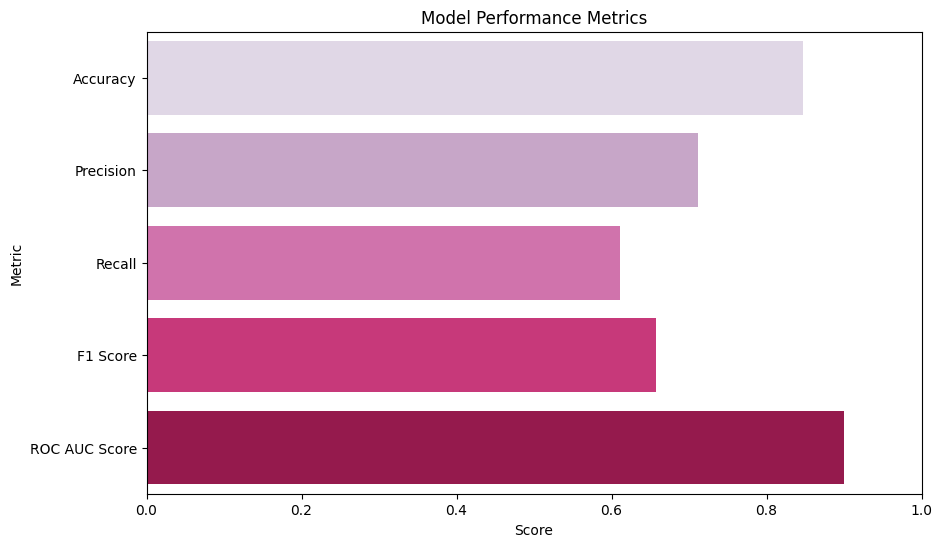

In [17]:
# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Metric', data=metrics_df, hue='Metric', palette='PuRd')
plt.title('Model Performance Metrics')
plt.xlabel('Score')
plt.ylabel('Metric')
plt.xlim(0, 1)
plt.show()

#### ROC Curve

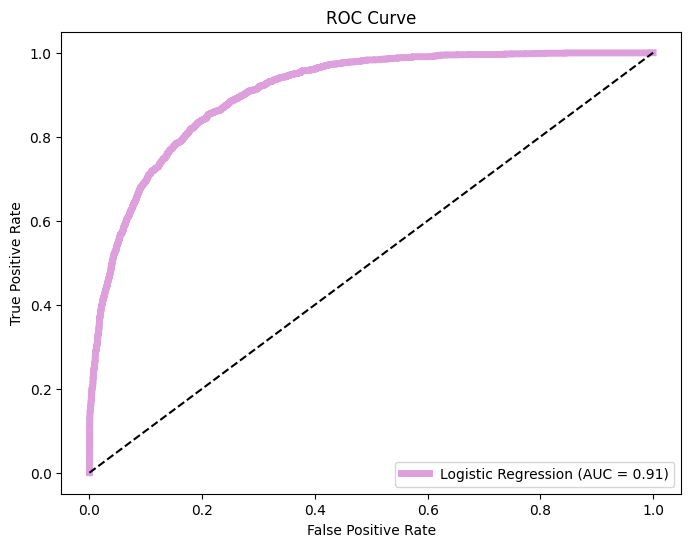

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})', color='plum', lw=5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Model Selection

## Compare Multiple Models

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Trains the model, makes predictions, and gathers performance metrics.

    Parameters:
    model: A machine learning model instance.
    X_train: Training features.
    X_test: Testing features.
    y_train: Training labels.
    y_test: Testing labels.

    Returns:
    A dictionary containing the model name and performance metrics.
    """
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test)

    # Calculate metrics
    metrics = {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC Score': roc_auc_score(y_test, y_pred_proba)
    }

    return metrics


## Compare Performance Metrics

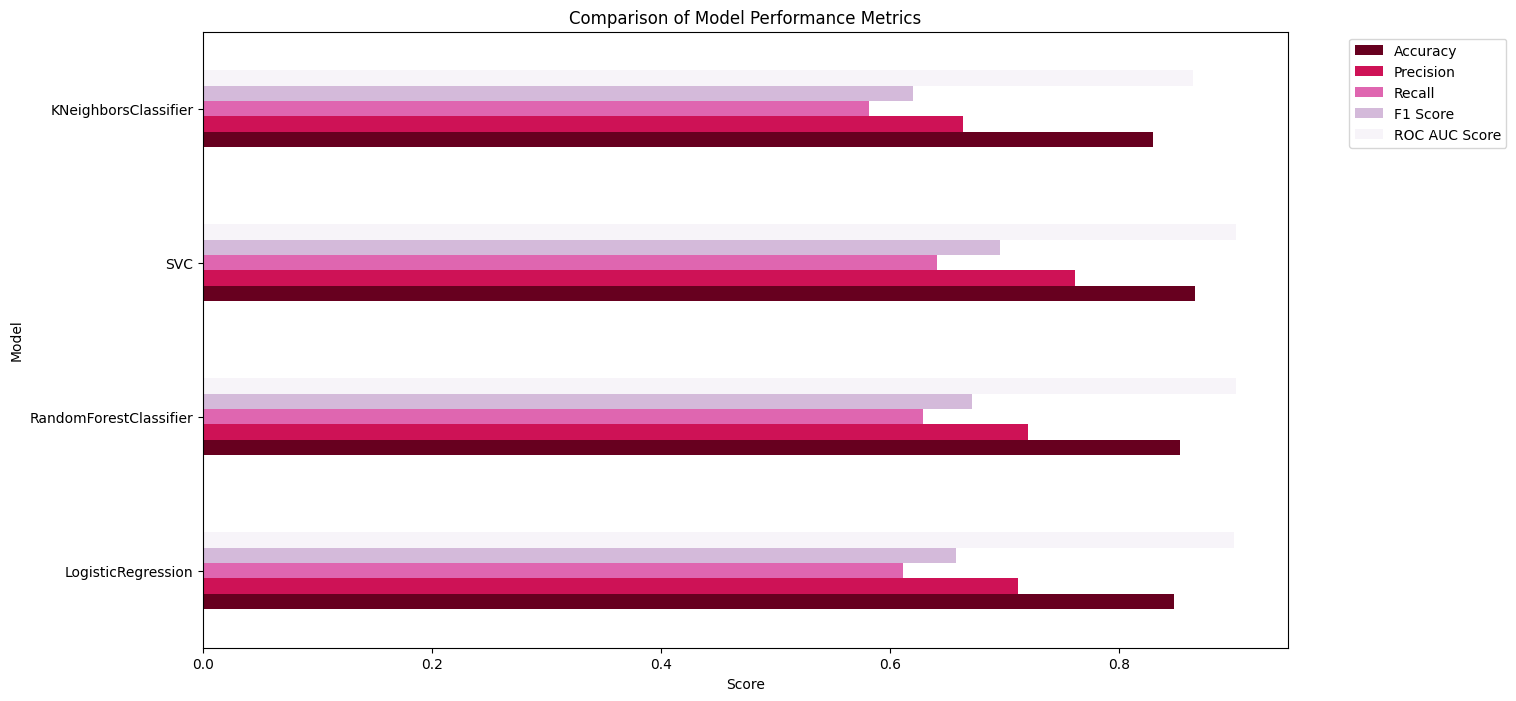

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model,,,,,
LogisticRegression,0.847492,0.711443,0.611111,0.657471,0.900473
RandomForestClassifier,0.852610,0.720588,0.628205,0.671233,0.902095
SVC,0.865916,0.761421,0.641026,0.696056,0.902144
KNeighborsClassifier,0.829069,0.663415,0.581197,0.619590,0.863935


In [49]:
# List of models to evaluate
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(probability=True, random_state=42),
    KNeighborsClassifier()
]

# Evaluate each model and gather metrics
metrics_list = [evaluate_model(model, X_train, X_test, y_train, y_test) for model in models]
# Convert the list of metrics to a DataFrame
metrics_df = pd.DataFrame(metrics_list)
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='barh', figsize=(14, 8), colormap='PuRd_r')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Model')
plt.xlabel('Score')
# plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display the DataFrame
metrics_df

# Model Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the best model (e.g., RandomForestClassifier)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_metrics = evaluate_model(best_model, X_train, X_test, y_train, y_test)

# Print the best model's parameters and metrics
print("Best parameters:", grid_search.best_params_)
print("Best model metrics:", best_metrics)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best model metrics: {'Model': 'RandomForestClassifier', 'Accuracy': 0.8679631525076765, 'Precision': 0.7638190954773869, 'Recall': 0.6495726495726496, 'F1 Score': 0.7020785219399538, 'ROC AUC Score': 0.9117403457914898}


## Feature Importance

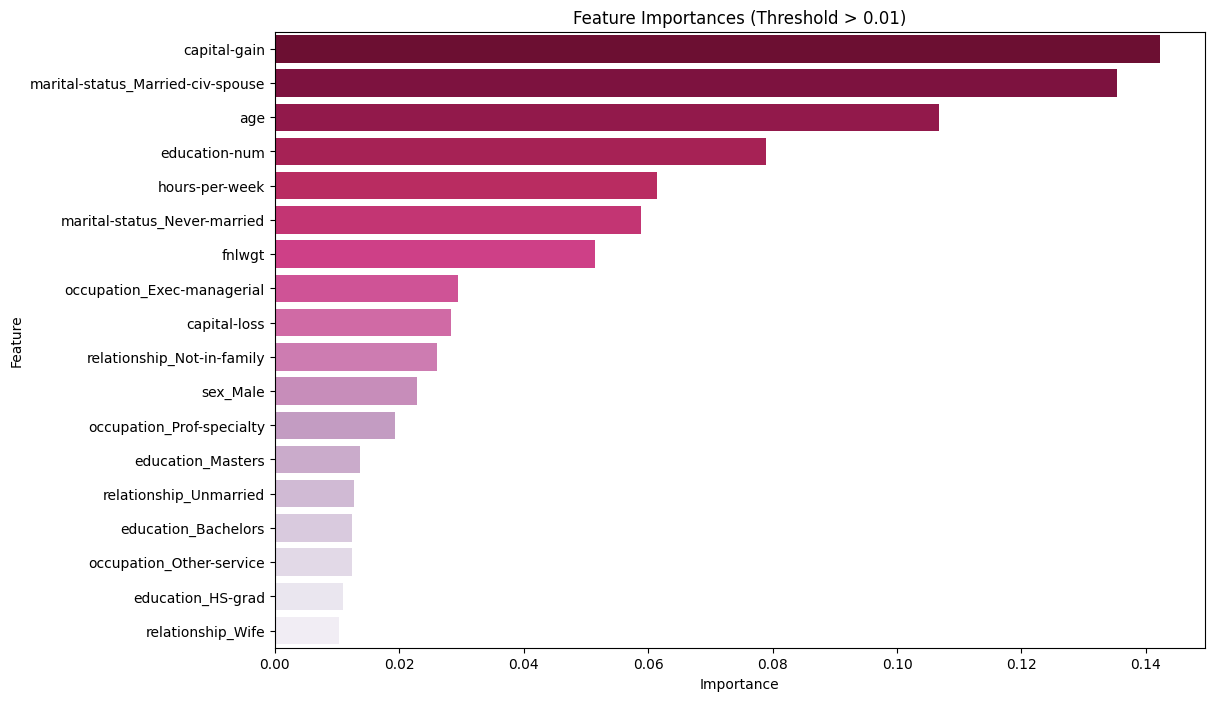

In [54]:
# Get feature importances from the best model
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X_train.columns

    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Apply threshold
    threshold = 0.01
    important_features_df = feature_importance_df[feature_importance_df['Importance'] > threshold]

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=important_features_df, hue='Feature', palette='PuRd_r')
    plt.title('Feature Importances (Threshold > 0.01)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()




#### Saving and Loading the Model

Save the trained model to disk and demonstrate how to load it for future use.



In [56]:
import joblib

# Save the model
joblib.dump(best_model, 'best_model.pkl')

# Load the model
loaded_model = joblib.load('best_model.pkl')

# Confirm the model is loaded correctly
loaded_metrics = evaluate_model(loaded_model, X_train, X_test, y_train, y_test)
print("Loaded model metrics:", loaded_metrics)

Loaded model metrics: {'Model': 'RandomForestClassifier', 'Accuracy': 0.8679631525076765, 'Precision': 0.7638190954773869, 'Recall': 0.6495726495726496, 'F1 Score': 0.7020785219399538, 'ROC AUC Score': 0.9117403457914898}


### Final Evaluation

Evaluate the final model on a validation set or unseen data to ensure its robustness.

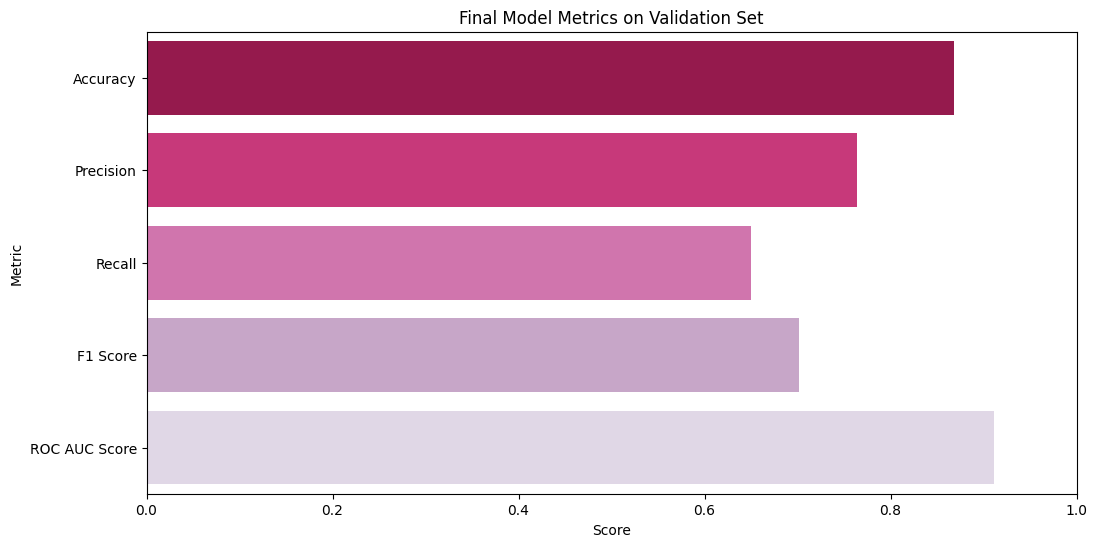

In [68]:
# Evaluate the model on the validation set
final_metrics = evaluate_model(best_model, X_train, X_test, y_train, y_test)

def plot_metrics(metrics, title="Model Metrics"):
    # Convert the metrics dictionary to a DataFrame
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Score'])

    # Filter out the model name row
    metrics_df = metrics_df[metrics_df.index != 'Model']

    # Plot the metrics as a horizontal bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Score', y=metrics_df.index, data=metrics_df, hue=metrics_df.index, palette='PuRd_r')
    plt.title(title)
    plt.xlabel('Score')
    plt.ylabel('Metric')
    plt.xlim(0, 1)
    plt.show()

# Example usage after evaluating the final model
plot_metrics(final_metrics, title="Final Model Metrics on Validation Set")
